In [118]:
#Import the necessary libraries
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [50]:
import zipfile
zip = zipfile.ZipFile('Food Dataset.zip')
zip.extractall()

# Exploring the Dataset


In [119]:
food_dataset_dir = 'Food Dataset/food-101/images'

# Creating Train, Test and Validation directories

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(food_dataset_dir, output = "Food Dataset/food-101/",
                    seed = 42, ratio = (.7, .2, .1), group_prefix = None)

Copying files: 2692 files [00:15, 150.68 files/s]

In [125]:
# dimensions of our images.
img_width, img_height = 150, 150

test_dir = 'Food Dataset/food-101/test'
train_dir = 'Food Dataset/food-101/train'
val_dir = 'Food Dataset/food-101/val'

nb_train_samples = 5000
nb_validation_samples = 5000
epochs = 30
batch_size = 16

# Displaying the images of the dataset

In [126]:
class_names = ["apple_pie", "breakfast_burrito", "beef_tartare", "ceviche", "cheese_plate", 
               "cheesecake", "donuts", "dumplings", "french_toast", "fried_rice", "fish_and_chips", "french_onion_soup",
               "garlic_bread", "macarons", "omelette", "oysters",
               "ravioli", "samosa", "tacos", "waffles", "scallops", "sushi", "pizza","nachos", "hamburger"]


In [127]:
import os
import shutil
import PIL
import PIL.Image

for fruit in class_names:
    fruit_path = f"Food Dataset/food-101/images/{fruit.lower()}"
    #print(fruit, len(os.listdir(fruit_path)))
    #for image in os.listdir(fruit_path):
     #   print(image)
        

#PIL.Image.open(str(fruit_path[0]))
        

# Exploratory Data Analysis of Dataset

In [128]:
random_classes = {'Class_0': len(os.listdir('Food Dataset/food-101/images/apple_pie')),
'Class_1': len(os.listdir('Food Dataset/food-101/images/french_onion_soup')),
'Class_2': len(os.listdir('Food Dataset/food-101/images/ravioli')),
'Class_3': len(os.listdir('Food Dataset/food-101/images/hamburger'))}

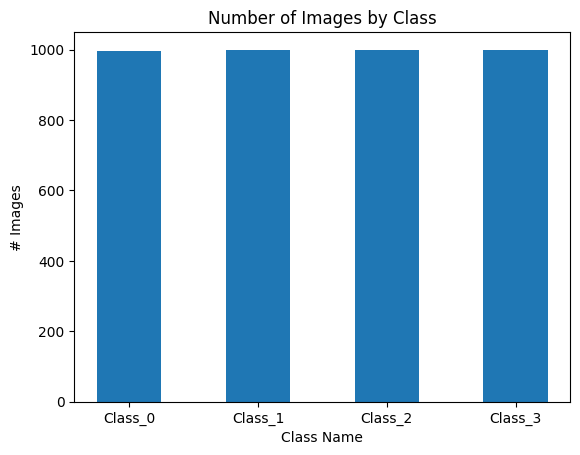

In [129]:
plt.bar(random_classes.keys(), random_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

# Plotting Image for basic analysis

<dtype: 'uint8'>


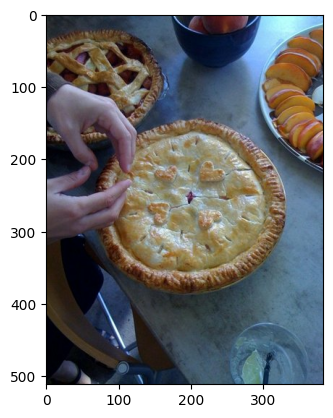

In [130]:
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import io
from tensorflow import image
from matplotlib import pyplot as plt

filterwarnings("ignore") 
tf_img = io.read_file("Food Dataset/food-101/images/apple_pie/134.jpg")
tf_img = image.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.imshow(tf_img)
# plt.show()

# Add parameters and Hyperparameters

In [131]:
# Step 4: Adding hyperparameters
learning_rate = 0.001
batch_size = 32

# Building the Image classifier deep learning model

In [132]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [133]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [134]:
# building a linear stack of layers with the sequential model
dnn_model = Sequential()

# 1st convolutional layer
dnn_model.add(Conv2D(32, (3, 3), input_shape=input_shape))
dnn_model.add(Activation('relu'))
dnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd convolutional layer
dnn_model.add(Conv2D(32, (3, 3)))
dnn_model.add(Activation('relu'))
dnn_model.add(MaxPooling2D(pool_size=(2, 2)))


# 3rd convolutional layer
dnn_model.add(Conv2D(64, (3, 3)))
dnn_model.add(Activation('relu'))
dnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten output of conv
dnn_model.add(Flatten())


# hidden layer
dnn_model.add(Dense(64))
dnn_model.add(Activation('relu'))
dnn_model.add(Dropout(0.5))

# output layer
dnn_model.add(Dense(1))
dnn_model.add(Activation('softmax'))

In [135]:
# compile model
dnn_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [136]:
dnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_25 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 activation_26 (Activation)  (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                 

# Data Agumentation

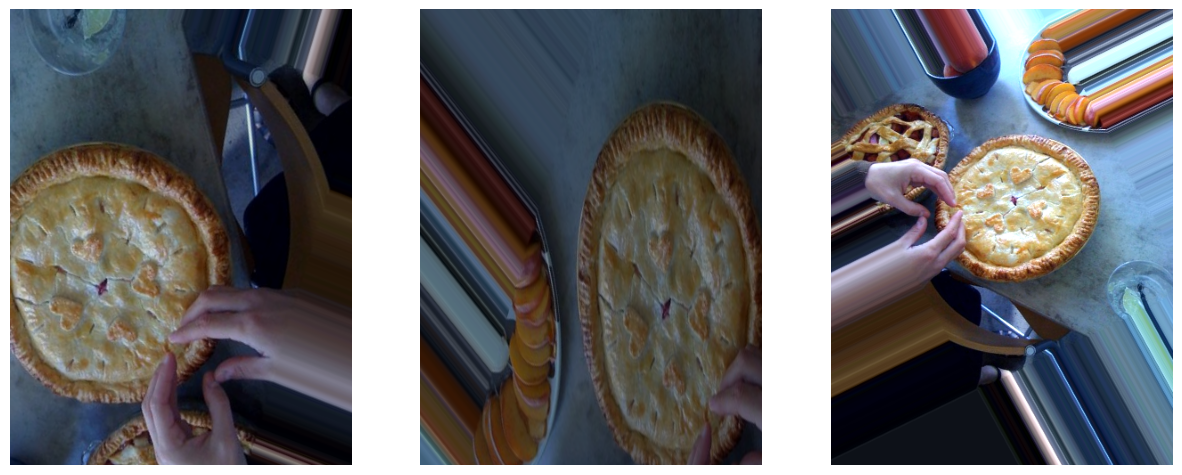

In [137]:
from matplotlib import pyplot
import matplotlib.image as mpimg
#load the cat image
image = mpimg.imread('Food Dataset/food-101/train/apple_pie/134.jpg')


#reshape the image into (batch_size, height, width, channels)
image = np.expand_dims(image, axis=0)

#view the shape of the image
image.shape

#apply transformations using ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=50,
                             horizontal_flip=True,
                             vertical_flip=True,
                             zoom_range=0.5,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             brightness_range=[0.5, 1.5])

#display the transformations of the image
img = datagen.flow(image, batch_size=1)
fig, ax = pyplot.subplots(nrows=1, ncols=3, figsize=(15,15))
for i in range(3):
    image = next(img)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')

In [138]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    rotation_range=50,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5, 1.5])


# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')



Found 17497 images belonging to 25 classes.
Found 4999 images belonging to 25 classes.


In [139]:
dnn_model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/30
156/156 [==============================] - 81s 513ms/step - loss: -1240557696.0000 - accuracy: 0.0389 - val_loss: -6108312064.0000 - val_accuracy: 0.0399
Epoch 2/30
156/156 [==============================] - 80s 509ms/step - loss: -32435234816.0000 - accuracy: 0.0411 - val_loss: -87817158656.0000 - val_accuracy: 0.0399
Epoch 3/30
156/156 [==============================] - 79s 509ms/step - loss: -225864794112.0000 - accuracy: 0.0401 - val_loss: -464770301952.0000 - val_accuracy: 0.0401
Epoch 4/30
156/156 [==============================] - 80s 515ms/step - loss: -885931769856.0000 - accuracy: 0.0397 - val_loss: -1581168984064.0000 - val_accuracy: 0.0399
Epoch 5/30
156/156 [==============================] - 78s 501ms/step - loss: -2554379632640.0000 - accuracy: 0.0373 - val_loss: -4171281465344.0000 - val_accuracy: 0.0401
Epoch 6/30
156/156 [==============================] - 79s 508ms/step - loss: -6111962857472.0000 - accuracy: 0.0433 - val_loss: -9368356519936.0000 - val_accu

In [140]:
loss, accuracy = dnn_model.evaluate(validation_generator)
print("Loss:", loss)
print("Accuracy:", accuracy)

157/157 [==============================] - 16s 104ms/step - loss: -17193301694218240.0000 - accuracy: 0.0400
Loss: -1.719330169421824e+16
Accuracy: 0.040008001029491425


# Data pipeline for feature extraction 

In [141]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
     validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds  = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
     validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 17497 files belonging to 25 classes.
Using 3499 files for validation.
Found 4999 files belonging to 25 classes.
Using 999 files for validation.


In [142]:
class_names = train_ds.class_names
print(class_names)

['apple_pie', 'beef_tartare', 'breakfast_burrito', 'ceviche', 'cheese_plate', 'cheesecake', 'donuts', 'dumplings', 'fish_and_chips', 'french_onion_soup', 'french_toast', 'fried_rice', 'garlic_bread', 'hamburger', 'macarons', 'nachos', 'omelette', 'oysters', 'pizza', 'ravioli', 'samosa', 'scallops', 'sushi', 'tacos', 'waffles']


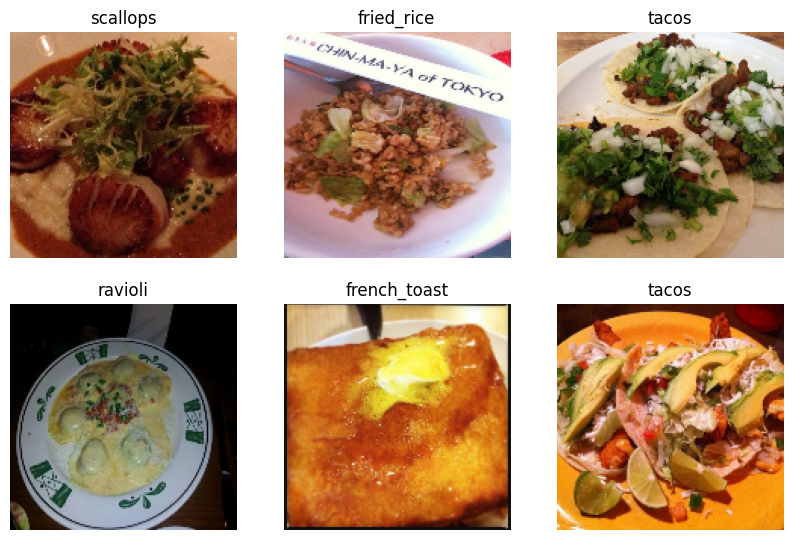

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# import the pre-trained ResNet-50 network

In [145]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet') # 6 Imagenet is a defacto standard for images classification.  
## A yearly contest is run with millions of training images in 1000 categories. 
## The models used in the imagenet classification competitions are measured against each other for performance. 
## Therefore it provides a "standard" measure for how good a model is for image classification. 
## So many often used transfer learning model models use the imagenet weights. 
## Your model if you are using transfer learning can be customized for your application by adding additional layers to the model.

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

In [146]:
resnet_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 256)               524544    
                                                                 
 dense_19 (Dense)            (None, 1)                 257       
                                                                 
Total params: 24,112,513
Trainable params: 524,801
Non-trainable params: 23,587,712
_________________________________________________________________


In [150]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
547/547 [==============================] - 445s 806ms/step - loss: -27961.2285 - accuracy: 0.0400 - val_loss: -86660.3438 - val_accuracy: 0.0400
Epoch 2/10
547/547 [==============================] - 731s 1s/step - loss: -199179.7969 - accuracy: 0.0400 - val_loss: -343060.0000 - val_accuracy: 0.0400
Epoch 3/10
547/547 [==============================] - 686s 1s/step - loss: -527207.7500 - accuracy: 0.0400 - val_loss: -747526.6250 - val_accuracy: 0.0400
Epoch 4/10
547/547 [==============================] - 522s 953ms/step - loss: -992319.6250 - accuracy: 0.0400 - val_loss: -1282996.2500 - val_accuracy: 0.0400
Epoch 5/10
547/547 [==============================] - 467s 853ms/step - loss: -1578622.2500 - accuracy: 0.0400 - val_loss: -1933253.0000 - val_accuracy: 0.0400
Epoch 6/10
547/547 [==============================] - 770s 1s/step - loss: -2274275.0000 - accuracy: 0.0400 - val_loss: -2689530.7500 - val_accuracy: 0.0400
Epoch 7/10
547/547 [==============================] - 775s

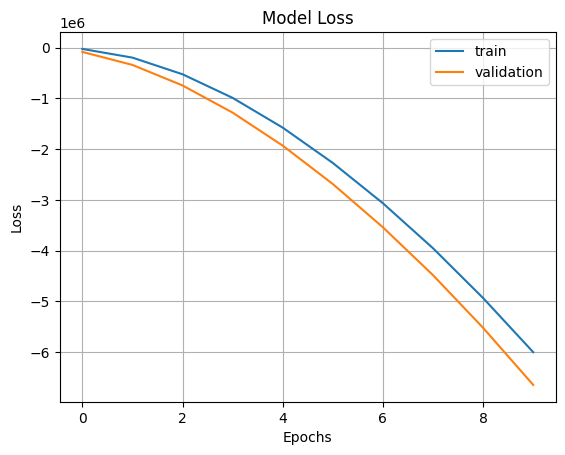

In [151]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [152]:
import cv2
image=cv2.imread('134.jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 150, 150, 3)


# Load the VGG16 Pre-trained Model

In [161]:
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Load the InceptionV3 Pre-Trained Model

In [162]:
# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3
# load model
model = InceptionV3()
# summarize the model
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_118 (Conv2D)            (None, 149, 149, 32  864         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_118[0][0]']             
 ormalization)                  )                                                      

 conv2d_129 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_9[0][0]']    
                                                                                                  
 batch_normalization_99 (BatchN  (None, 35, 35, 64)  192         ['conv2d_123[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 35, 35, 64)  192         ['conv2d_125[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 35, 35, 96)  288         ['conv2d_128[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_140 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_116 (Batch  (None, 35, 35, 64)  192         ['conv2d_140[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_146 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_138 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_14

                                                                                                  
 activation_153 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_123[0][0]']
                                                                                                  
 max_pooling2d_28 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_150[0][0]',         
                                                                  'activation_153[0][0]',         
                                                                  'max_pooling2d_28[0][0]']       
                                                                                                  
 conv2d_15

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_154[0][0]',         
                                                                  'activation_157[0][0]',         
                                                                  'activation_162[0][0]',         
                                                                  'activation_163[0][0]']         
                                                                                                  
 conv2d_162 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 17, 17, 160)  480        ['conv2d_162[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_172 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_148 (Batch  (None, 17, 17, 160)  480        ['conv2d_172[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_178 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_173 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_178[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 17, 17, 160)  480        ['conv2d_173[0][0]']             
 Normaliza

 activation_188 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_158[0][0]']
                                                                                                  
 conv2d_183 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_188[0][0]']         
                                                                                                  
 batch_normalization_159 (Batch  (None, 17, 17, 192)  576        ['conv2d_183[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_189 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_179 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_197 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_167[0][0]']
                                                                                                  
 conv2d_188 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_192 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_197[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 17, 17, 192)  576        ['conv2d_188[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_202 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_16[0][0]']   
                                                                                                  
 batch_normalization_170 (Batch  (None, 8, 8, 320)   960         ['conv2d_194[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_202 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_203 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_173[0][0]']
          

                                                                                                  
 activation_211 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_181[0][0]']
                                                                                                  
 activation_212 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_182[0][0]']
                                                                                                  
 activation_215 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_216 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 8, 8, 192)   576         ['conv2d_211[0][0]']             
 Normaliza

 #  Adding layers on top of feature extractor model

In [185]:
# Step 6: Model building
model = Sequential()
final_model = model.add(feature_extraction_resnet_layer)
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [186]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [187]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_18 (Dense)            (None, 256)               524544    
                                                                 
 dense_19 (Dense)            (None, 3)                 771       
                                                                 
Total params: 24,113,027
Trainable params: 525,315
Non-trainable params: 23,587,712
_________________________________________________________________


# Getting output of the layers of CNN

In [168]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense_14')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_15')>]

# Feature maps

In [191]:
model.save('cnn-model.pkl')

INFO:tensorflow:Assets written to: cnn-model.pkl\assets


INFO:tensorflow:Assets written to: cnn-model.pkl\assets


# Feature map - on Resnet Feature extractor(used inside the CNN base model)

1/1 [==============================] - 1s 1s/step


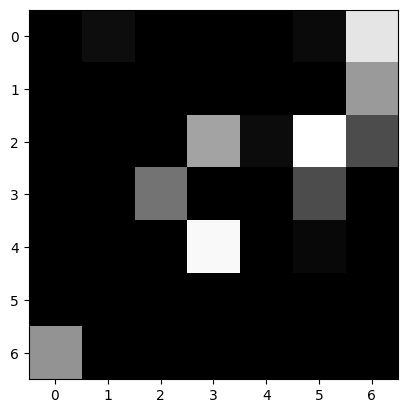

In [194]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet')

# Create a new model that outputs the intermediate layer activations
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('conv5_block3_out').output)

# Load and preprocess an example image
img_path = '134.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Extract the feature map
feature_map = feature_extractor.predict(x)

# Visualize the feature map
plt.imshow(feature_map[0, :, :, 0], cmap='gray')
plt.show()
